In [2]:
# import sys
# sys.path.append('../python_scripts')

import matplotlib.pyplot as plt
import pylab as p
import numpy as np
import os
from glob import glob
from scipy.interpolate import interp1d


import sys
sys.path.insert(0, '/data/disk1/fragkos/repos/CE_mesa/python_scripts')
import mesa as ms
import binary as bn
from savitzky_golay import *

Lsun = 3.828e33
secyer = 24.0*3600.0*365.24
GGG = 6.674e-8
Msun = 1.989e33
Rsun = 6.955e10
clight = 29979245800
pi = 3.1415
crad = 7.57e-15



%matplotlib inline 
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.figsize'] = 12, 6  # that's default image size for this interactive session
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12



run_path= "/data/disk1/fragkos/mesa_projects/CE/CE_paperI_BBH/8M_30M_1000R/"
run_name = "step2_macleod_setE2_noMLT"
fig_label = "8M_30M_1000R_"+run_name+"_"


data_path = run_path+run_name+"/LOGS/"
a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='log_mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)
print len(a.profiles)



Process running in parallel on  48  cores
Process running in parallel on  48  cores
349


In [18]:
print(a.history.dtype.names)
print("")
print(a.profiles[0].dtype.names)
print(a.profiles[-1]["dr_dt"])

('model_number', 'star_age', 'star_mass', 'log_dt', 'log_xmstar', 'log_abs_mdot', 'num_zones', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'conv_mx1_top_r', 'conv_mx1_bot_r', 'conv_mx2_top_r', 'conv_mx2_bot_r', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'he_core_radius', 'he_core_lgT', 'he_core_lgRho', 'he_core_L', 'he_core_v', 'he_core_omega', 'he_core_omega_div_omega_crit', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'tau10_mass', 'tau10_radius', 'tau10_lgP', 'tau10_lgT', 'tau10_lgRho', 'tau10_L', 'tau100_mass', 'tau100_radius', 'tau100_lgP', 'tau100_lgT', 'tau100_lgRho', 'tau100_L', 'dynamic_timescale', 'kh_timescale', 'mdot_timescale', 'kh_div_mdot_timescales', 'nuc_timescale', 'log_chem_timescale', 'log_chem_timescale_div_time_step', 'log_cell_collapse_timescale', 'log_LH',

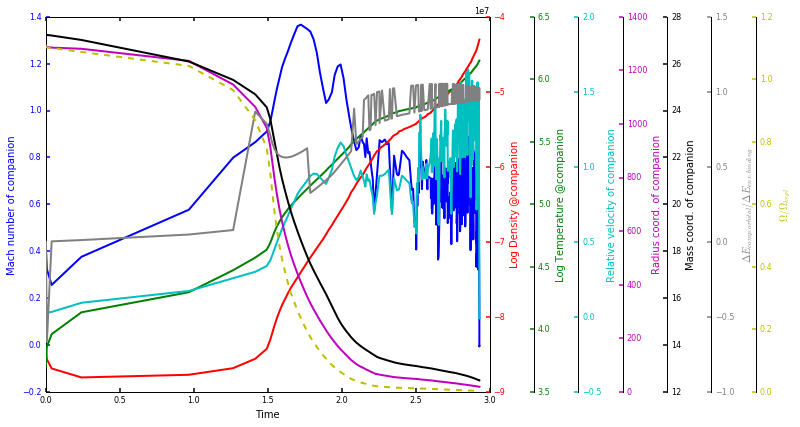

In [19]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)


par1 = host.twinx()

par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

par3 = host.twinx()
par3.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

par4 = host.twinx()
par4.spines["right"].set_position(("axes", 1.3))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)

par5 = host.twinx()
par5.spines["right"].set_position(("axes", 1.4))
make_patch_spines_invisible(par5)
par5.spines["right"].set_visible(True)

par6 = host.twinx()
par6.spines["right"].set_position(("axes", 1.5))
make_patch_spines_invisible(par6)
par6.spines["right"].set_visible(True)

par7 = host.twinx()
par7.spines["right"].set_position(("axes", 1.6))
make_patch_spines_invisible(par7)
par7.spines["right"].set_visible(True)


m_at_comp = np.interp(a.profile_age, a.history['star_age'],a.history["CE_companion_position_m"])
r_at_comp = np.interp(a.profile_age, a.history['star_age'],a.history["CE_companion_position_r"])
v_rel = np.interp(a.profile_age, a.history['star_age'],a.history["v_rel"])
mach = np.interp(a.profile_age, a.history['star_age'],a.history["v_over_c_sound"])
DeltaE_orb = np.interp(a.profile_age, a.history['star_age'],a.history["cumulative_extra_heating"])
DeltaE_bind = np.interp(a.profile_age, a.history['star_age'],a.history["envelope_binding_energy"]) - a.history["envelope_binding_energy"][0]




# logRho_at_comp = np.zeros(len(a.profile_age))
# logT_at_comp = np.zeros(len(a.profile_age))
# omega_div_omega_crit_at_comp = np.zeros(len(a.profile_age))
# omega_div_omega_kep_at_comp = np.zeros(len(a.profile_age))

logRho_at_comp_func = interp1d(10**a.profiles[i]["logR"],a.profiles[i]["logRho"])
logT_at_comp = interp1d(10**a.profiles[i]["logR"],a.profiles[i]["logT"])
omega_div_omega_crit_at_comp = interp1d(10**a.profiles[i]["logR"],a.profiles[i]["omega_div_omega_crit"])
omega_div_omega_kep_at_comp = interp1d(10**a.profiles[i]["logR"],a.profiles[i]["omega_div_omega_crit"]*a.profiles[i]["omega_crit"])

logRho_at_comp = logRho_at_comp_func(r_at_comp)
logT_at_comp = logT_at_comp(r_at_comp)
omega_div_omega_crit_at_comp = omega_div_omega_crit_at_comp(r_at_comp)
omega_div_omega_kep_at_comp = omega_div_omega_kep_at_comp(r_at_comp)
omega_div_omega_kep_at_comp = omega_div_omega_kep_at_comp/(np.sqrt(GGG*(m_at_comp*Msun)/(r_at_comp*Rsun)**3))



# x_axis_variable = r_at_comp
# host.set_xlabel('Radius Coordinate')

# x_axis_variable = m_at_comp
# host.set_xlabel('Mass Coordinate')

x_axis_variable = a.profile_age
host.set_xlabel('Time')


smooth_w = 3
smooth_o = 1

pl, = host.plot(x_axis_variable, savitzky_golay(mach,smooth_w, smooth_o), color='b')
pl1, = par1.plot(x_axis_variable, savitzky_golay(logRho_at_comp,smooth_w, smooth_o), color='r')
pl2, = par2.plot(x_axis_variable, savitzky_golay(logT_at_comp,smooth_w, smooth_o), color='g')
pl3, = par3.plot(x_axis_variable, savitzky_golay(v_rel,smooth_w, smooth_o), color='c')
pl4, = par4.plot(x_axis_variable, r_at_comp, color='m')
pl5, = par5.plot(x_axis_variable, m_at_comp, color='k')
pl6, = par6.plot(x_axis_variable, DeltaE_orb/DeltaE_bind, color='grey')
#pl7_1, = par7.plot(x_axis_variable,savitzky_golay(omega_div_omega_crit_at_comp,51,3), color='y')
pl7_1, = par7.plot(x_axis_variable, savitzky_golay(omega_div_omega_kep_at_comp,smooth_w, smooth_o), color='y', linestyle='dashed')





# Label y-axes
host.set_ylabel('Mach number of companion')
par1.set_ylabel('Log Density @companion')
par2.set_ylabel('Log Temperature @companion')
par3.set_ylabel('Relative velocity of companion')
par4.set_ylabel('Radius coord. of companion')
par5.set_ylabel('Mass coord. of companion')
par6.set_ylabel(r'$\Delta E_{comp. orbital}/\Delta E_{env. binding}$')
par7.set_ylabel(r'$\Omega/\Omega_{kepl}$')



# Set y-axis label colors
host.yaxis.label.set_color(pl.get_color())
par1.yaxis.label.set_color(pl1.get_color())
par2.yaxis.label.set_color(pl2.get_color())
par3.yaxis.label.set_color(pl3.get_color())
par4.yaxis.label.set_color(pl4.get_color())
par5.yaxis.label.set_color(pl5.get_color())
par6.yaxis.label.set_color(pl6.get_color())
par7.yaxis.label.set_color(pl7_1.get_color())

# Set y-axis tick colors
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=pl.get_color(), **tkw)
par1.tick_params(axis='y', colors=pl1.get_color(), **tkw)
par2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
par3.tick_params(axis='y', colors=pl3.get_color(), **tkw)
par4.tick_params(axis='y', colors=pl4.get_color(), **tkw)
par5.tick_params(axis='y', colors=pl5.get_color(), **tkw)
par6.tick_params(axis='y', colors=pl6.get_color(), **tkw)
par7.tick_params(axis='y', colors=pl7_1.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

host.ticklabel_format(useOffset=False)
par1.ticklabel_format(useOffset=False)
par2.ticklabel_format(useOffset=False)
par3.ticklabel_format(useOffset=False)
par4.ticklabel_format(useOffset=False)
par5.ticklabel_format(useOffset=False)
par6.ticklabel_format(useOffset=False)
par7.ticklabel_format(useOffset=False)

plt.tight_layout()
plt.savefig(fig_label+"_properties_at_comp_vs_time.pdf")


plt.show()

TypeError: expected non-empty vector for x

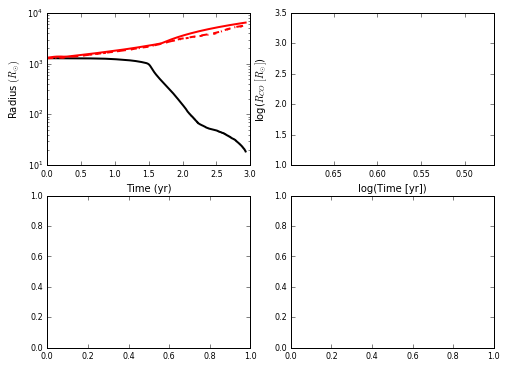

In [20]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# plt.rc('font', **font)

#plt.style.use('classic')




xlim_min = 5
xlim_max = np.max(a.history['star_age'])



fig, ax = plt.subplots(2,2, figsize=(8, 6))



ax[0,0].plot(a.history['star_age'], a.history["CE_companion_position_r"], linewidth=2, color='k', label = "CO position $r_{CO}$")
ax[0,0].plot(a.history['star_age'], 10**a.history["log_R"], color='r', label="Stellar radius")
ax[0,0].plot(a.history['star_age'], a.history["tau10_radius"], color='r', linestyle="--", label=r"Radius @ $\tau$ = 10")
ax[0,0].plot(a.history['star_age'], a.history["tau100_radius"], color='r',linestyle="-.", label=r"Radius @ $\tau$ = 100")

ax[0,0].legend(fontsize=8, bbox_to_anchor=(0.9, 0.83),
           bbox_transform=plt.gcf().transFigure)

ax[0,0].set_xlabel("Time (yr)")
ax[0,0].set_ylabel(r"Radius $(R_{\odot})$")
#ax[0,0].set_xlim(0.1, 60)
#plt.ylim(200, 350)
# plt.xscale('log')
ax[0,0].set_yscale('log')
#ax[0,0].set_xlim(0,20)





ax[0,1].plot(np.log10(a.history['star_age']), np.log10(a.history["CE_companion_position_r"]), linewidth=2, color='k')
ax[0,1].set_xlabel("log(Time [yr])")
ax[0,1].set_ylabel(r"log($R_{CO}\ [R_{\odot}]$)")
ax[0,1].set_xlim(np.log10(xlim_min), np.log10(xlim_max))
# ax[0,1].set_ylim(1.0, 1.5)




idx = np.where(a.history['star_age'] > xlim_min)
z = np.polyfit(np.log10(a.history['star_age'][idx]), np.log10(a.history["CE_companion_position_r"][idx]), 1)
print(z)
ax[0,1].plot(np.log10(a.history['star_age'][idx]), z[1]+z[0]*np.log10(a.history['star_age'][idx]), linewidth=2, color='b',linestyle=":",label=r"$r_{CO}/R_{\odot} \simeq "+str(round(10.**z[1], 1))+" (t/yr)^{"+str(round(z[0], 2))+"}$")
ax[0,1].legend(loc=0, fontsize=8)



ax[1,0].plot(a.history['star_age'], a.history["CE_companion_position_m"], linewidth=2, color='k', label = r"CO position $m_{CO}$")
ax[1,0].plot(a.history['star_age'], a.history["star_mass"], color='r', label="Stellar mass")
ax[1,0].plot(a.history['star_age'], a.history["tau10_mass"], color='r', linestyle="--", label=r"Mass coord. @ $\tau$ = 10")
ax[1,0].plot(a.history['star_age'], a.history["tau100_mass"], color='r',linestyle="-.", label=r"Mass coord. @ $\tau$ = 100")

ax[1,0].legend(loc=0, fontsize=8)

ax[1,0].set_xlabel(r"Time (yr)")
ax[1,0].set_ylabel(r"Mass $(M_{\odot})$")
ax[1,0].set_xlim(0,20)


#plt.xlim(0.1, 60)
#plt.ylim(200, 350)
# plt.xscale('log')
# plt.yscale('log')





ax[1,1].plot(np.log10(a.history['star_age']), np.log10(a.history["CE_companion_position_m"]), linewidth=2, color='k')
ax[1,1].set_xlabel(r"log(Time [yr])")
ax[1,1].set_ylabel(r"log($ m_{CO}\ [M_{\odot}])$")
ax[1,1].set_xlim(np.log10(xlim_min), np.log10(xlim_max))
#ax[1,1].set_ylim(0.62, 0.64)

idx = np.where(a.history['star_age'] > xlim_min)
z = np.polyfit(np.log10(a.history['star_age'][idx]), np.log10(a.history["CE_companion_position_m"][idx]), 1)
print(z)
ax[1,1].plot(np.log10(a.history['star_age'][idx]), z[1]+z[0]*np.log10(a.history['star_age'][idx]), color='b',linestyle=":",label=r"$m_{CO}/M_{\odot} \simeq "+str(round(10.**z[1], 1))+" (t/yr)^{"+str(round(z[0], 2))+"}$")
ax[1,1].legend(loc=0, fontsize=8)




plt.tight_layout()
plt.savefig(fig_label+"inspiral_R_M_vs_t.png", dpi=300)
plt.show()


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 3))

idx = np.where(a.history["model_number"] > 100)

ax[2].plot(a.history['log_Teff'][idx], a.history["log_L"][idx], color='k',linewidth=2)
xwidth = max(a.history['log_Teff']) - min(a.history['log_Teff'])
#plt.xlim(0.1*xwidth + max(a.history['log_Teff']), -0.1*xwidth + min(a.history['log_Teff']))
ax[2].set_xlabel(r"${\rm log}({\rm T}_{\rm eff}\ [K])$")
ax[2].set_ylabel(r"${\rm log}(L\ [L_{\odot}])$")
ax[2].plot(a.history['log_Teff'][idx[0][0]], a.history["log_L"][idx[0][0]],"*", color="b", markersize=10)
ax[2].invert_xaxis()


sigma_B = 5.6704*10**(-5)
Rsun = 6.957e10
Lsun = 3.839e33
Msun = 1.989e33

radii = np.asarray([100,200,500,1000,2000,5000,10000,20000,50000,100000])
Teff = np.linspace(1000,4000,100)
for radius in radii:
    ax[2].plot(np.log10(Teff),np.log10((4.*3.1415*(radius*Rsun)**2*sigma_B*Teff**4)/Lsun),linestyle=":",color="k")


# aa=1
# bb=4
# MM =16.
# AA = 1./101.
# BB = 7./51.
# CC = 13./51.
# DD = np.log10(4000)
# logL_hayashi = np.linspace(np.min(a.history["log_L"]), np.max(a.history["log_L"]), num=20)
# logTeff_hayashi = AA*logL_hayashi + BB* np.log10(MM) + CC*np.log10(0.5) + DD

# plt.plot(logTeff_hayashi, logL_hayashi, color='g')
# print(logTeff_hayashi)
# print(logL_hayashi)
# plt.show()

ax[0].plot(a.history['star_age'][idx], a.history["log_L"][idx], color='k',linewidth=2)
ax[0].set_xlabel("Star Age (yr)")
ax[0].set_ylabel(r"${\rm log}(L\ [L_{\odot}])$")
ax[0].set_xlim(0,20)




ax[1].plot(a.history['star_age'][idx], 10**a.history["log_Teff"][idx], color='k',linewidth=2)
ax[1].set_xlabel("Star Age (yr)")
ax[1].set_ylabel(r'$T_{\rm eff}\ (K)$')
ax[1].set_xlim(0,20)



# fig = plt.figure(figsize=(4,3), dpi=400)
# plt.plot(a.history['star_age'], a.history["u_mag"], label="U")
# plt.plot(a.history['star_age'], a.history["b_mag"], label="B")
# plt.plot(a.history['star_age'], a.history["v_mag"], label="V")
# plt.plot(a.history['star_age'], a.history["r_mag"], label="R")
# plt.plot(a.history['star_age'], a.history["i_mag"], label="I")


# plt.xlabel("Star Age (yr)")
# plt.ylabel(r'Abs. magnitude$')

plt.tight_layout()
plt.savefig(fig_label+"L_Teff.png",dpi=300)
plt.show()




In [ ]:
companion_position_m_at_profiles = np.interp(a.profile_age, a.history['star_age'],a.history["CE_companion_position_m"])
companion_position_r_at_profiles = np.interp(a.profile_age, a.history['star_age'],a.history["CE_companion_position_r"])


gamma3_at_companion = np.zeros(len(a.profile_age))
omega_div_omega_kep_at_companion = np.zeros(len(a.profile_age))
omega_div_omega_crit_at_companion = np.zeros(len(a.profile_age))
v_rel_div_csound = np.zeros(len(a.profile_age))
v_rel = np.zeros(len(a.profile_age))


for i in range(len(a.profile_age)):
    gamma3_at_companion[i] = np.interp(companion_position_r_at_profiles[i],10**a.profiles[i]["logR"],a.profiles[i]["gamma3"])


fig = plt.figure(figsize=(4,3), dpi=400)

plt.xlabel(r"r$_{CO}$ [R$_\odot$]")
plt.ylabel(r"$\gamma_3$ @ CO position")
plt.ylim(1.,1.5)
plt.plot(companion_position_r_at_profiles, gamma3_at_companion, linewidth=2)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
d_CE_companion_position_m_dt = -np.gradient(a.history["CE_companion_position_m"])/(10.**a.history["log_dt"])
d_CE_companion_position_r_dt = -np.gradient(a.history["CE_companion_position_r"])/(10.**a.history["log_dt"])


fig = plt.figure(figsize=(4,3), dpi=400)

plt.ylabel(r"Inspiral rate (M$_{\odot}$/yr)")
plt.xlabel(r"Radial coordinate of CO (R$_{\odot}$)")
# plt.ylim(1.,1.5)
plt.plot(a.history["CE_companion_position_r"], d_CE_companion_position_m_dt, linewidth=2)
plt.yscale("log")
plt.ylim(0.00001,100)
plt.gca().invert_xaxis()

plt.plot(a.history["CE_companion_position_r"],a.history["Mdot_macleod"]/Msun*secyer)

plt.tight_layout()

plt.savefig(fig_label+"inspiral_rate_m_vs_R.pdf")


plt.show()


fig = plt.figure(figsize=(4,3), dpi=400)

plt.ylabel(r"Inspiral rate (M$_{\odot}$/yr)")
plt.xlabel(r"Time (yr)")
# plt.ylim(1.,1.5)
plt.plot(a.history["star_age"], d_CE_companion_position_m_dt, linewidth=2)
plt.yscale("log")
plt.ylim(0.00001,100)
plt.xlim(0,20)


plt.plot(a.history["star_age"],a.history["Mdot_macleod"]/Msun*secyer)

plt.tight_layout()

plt.savefig(fig_label+"inspiral_rate_m_vs_time.pdf")

plt.show()

fig = plt.figure(figsize=(4,3), dpi=400)

plt.ylabel(r"Inspiral rate (R$_{\odot}$/yr)")
plt.xlabel(r"Radial coordinate of CO (R$_{\odot}$)")
# plt.ylim(1.,1.5)
plt.plot(a.history["CE_companion_position_r"], d_CE_companion_position_r_dt, linewidth=2)
plt.yscale("log")
plt.ylim(0.01,10000)
plt.gca().invert_xaxis()

#plt.plot(a.history["CE_companion_position_r"],a.history["Mdot_macleod"]/Msun*secyer)

plt.tight_layout()

plt.savefig(fig_label+"inspiral_rate_r_vs_R.pdf")


plt.show()


fig = plt.figure(figsize=(4,3), dpi=400)

plt.ylabel(r"Inspiral rate (R$_{\odot}$/yr)")
plt.xlabel(r"Time (yr)")
# plt.ylim(1.,1.5)
plt.plot(a.history["star_age"], d_CE_companion_position_r_dt, linewidth=2)
plt.yscale("log")
plt.ylim(0.01,10000)
plt.xlim(0,20)


#plt.plot(a.history["star_age"],a.history["Mdot_macleod"]/Msun*secyer)

plt.tight_layout()

plt.savefig(fig_label+"inspiral_rate_r_vs_time.pdf")

plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8, 3))



secyer = 31622400.0

lum = 10.0**a.history['log_L']
time_step = 10.0**a.history['log_dt'] * secyer
time = a.history["star_age"]

E_CE = np.cumsum(time_step*a.history["CE_energy_rate"])
ax[0].plot(time, E_CE, label="Injected")




E_rad = np.cumsum(lum*time_step)* 3.839e33
ax[0].plot(time, E_rad , label="Radiated away", linestyle='solid')

# E_nuc = np.cumsum(lum[0]*time_step)* 3.839e33
E_nuc = np.cumsum(10.**a.history["log_Lnuc"]*time_step)* 3.839e33

ax[0].plot(time, E_nuc , label="Nuclear", linestyle='solid')



E_kin = a.history["total_linear_kinetic_energy"]
ax[0].plot(time, a.history["total_linear_kinetic_energy"], linestyle='dashed', label=r"$\Delta E_{kinetic}$")
#ax[0].plot(time, a.history["total_rotational_kinetic_energy"], linestyle='dashed', label="Rotational")


E_grav = a.history["total_gravitational_energy"]-a.history["total_gravitational_energy"][0]
E_grav = E_grav -np.min(E_grav)
ax[0].plot(time, E_grav, linestyle='dashed', label=r"$\Delta E_{gravitational}$")

E_int = -(a.history["total_internal_energy"]-a.history["total_internal_energy"][0])
E_int = E_int -np.min(E_int)
#print(E_grav)
ax[0].plot(time, E_int, linestyle='dashed', label=r"$-\Delta E_{internal}$")


# ax[0].plot(time, E_CE+E_nuc+E_int-E_rad-E_kin-E_grav, linestyle='dashed')








Msun = 1.988e33
G = 6.6725e-8
Rsun = 6.957e10
E_available = G*a.history['he_core_mass'][-1]*Msun*Msun/(0.34*Rsun)


# plt.axhline(np.log10(E_available), color='k', linestyle='dotted', label="Available from orbit")
#plt.text("")

ax[0].set_xlabel('Star Age (yr)')
ax[0].set_ylabel('Cumulative Energy [erg]')
ax[0].set_xlim(0,20)


# plt.ylim(45, 48)


ax[0].legend(loc=0,fontsize=8)



# ax[1].plot(time,1-(E_rad+E_kin)/(E_CE+E_nuc))
ax[1].plot(time,(E_grav)/(E_CE))

ax[1].set_xlabel('Star Age (yr)')
ax[1].set_ylabel(r"Effective $\alpha_{CE}=\Delta E_{grav}/E_{inj.}$")
# ax[1].set_xlim(0,20)
ax[1].set_ylim(0,6)



plt.tight_layout()
plt.savefig(fig_label+"effective_alpha.pdf")
plt.show()



Process running in parallel on  48  cores


/data/disk1/fragkos/repos/CE_mesa/python_scripts/mesa.py:937: RuntimeWarning: invalid value encountered in log10
  data_to_plot = np.log10(np.transpose(self._data))


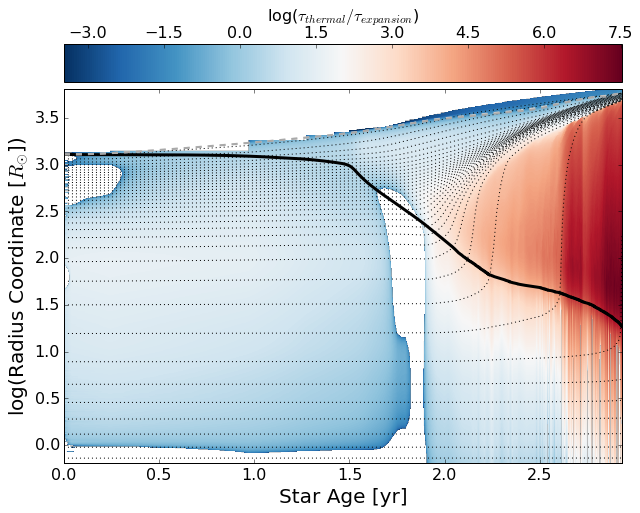

Process running in parallel on  48  cores


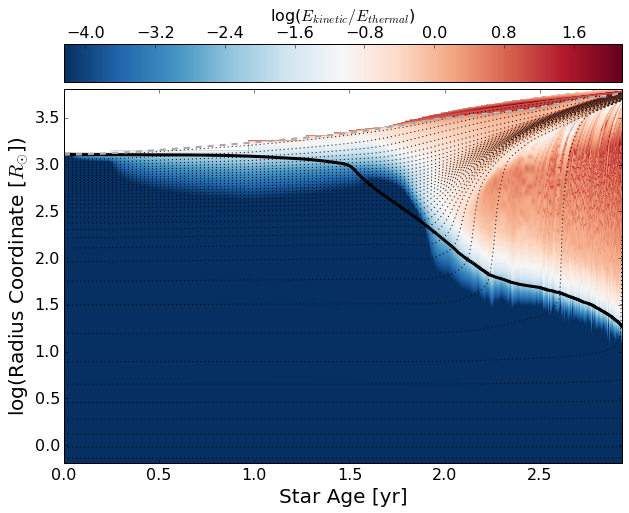

Process running in parallel on  48  cores


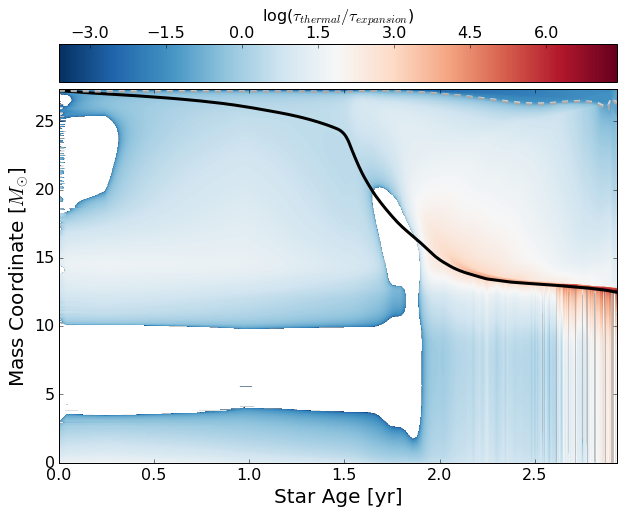

Process running in parallel on  48  cores


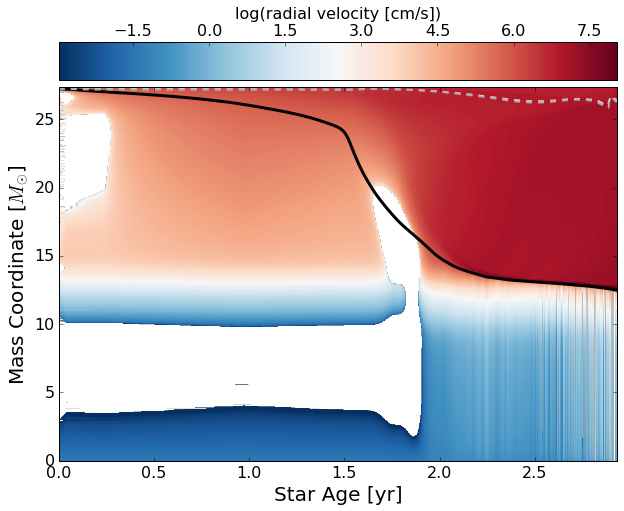

Process running in parallel on  48  cores


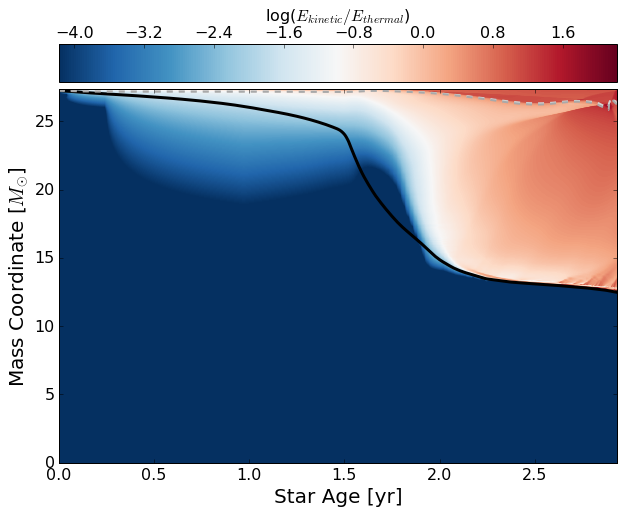

In [21]:
masses_TML = np.linspace(0.5,27.,54)
xvals_TML = np.linspace(1.1,1.9,54)


fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=11, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='log_radius', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='t_thermal_div_t_expansion')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"t_thermal_div_t_expansion.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=6.4, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='log_radius', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='E_kinetic_div_E_thermal')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"E_kinetic_div_E_thermal.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=11, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='mass', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='t_thermal_div_t_expansion')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"t_thermal_div_t_expansion_mass.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=11, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='mass', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='velocity')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"velocity_mass.pdf")
plt.show()



fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=6.4, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='mass', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='E_kinetic_div_E_thermal')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"E_kinetic_div_E_thermal_mass.pdf")
plt.show()

Process running in parallel on  48  cores


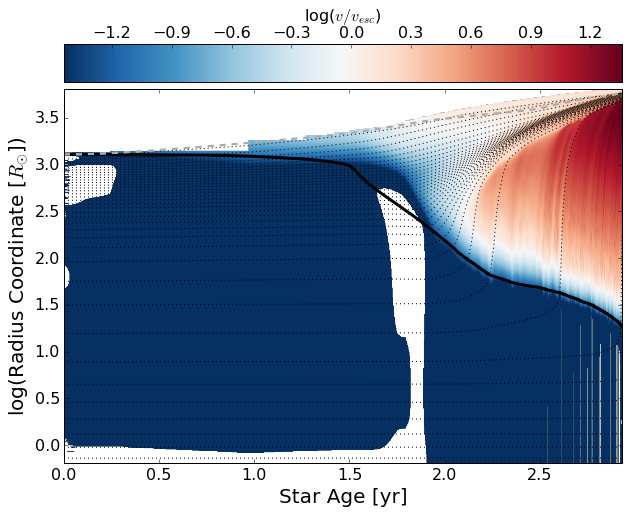

Process running in parallel on  48  cores


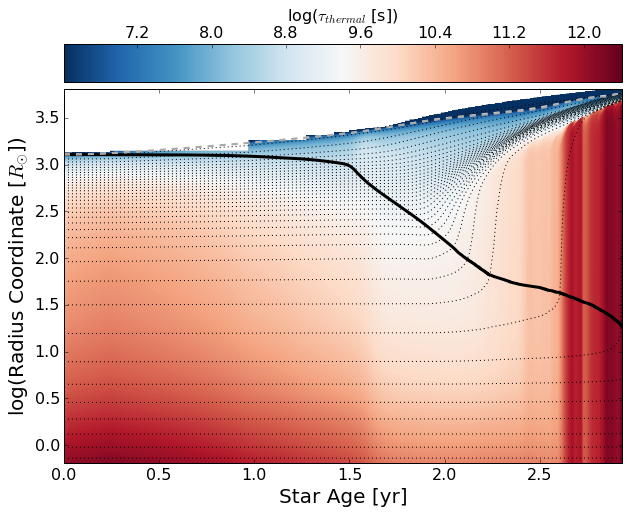

Process running in parallel on  48  cores


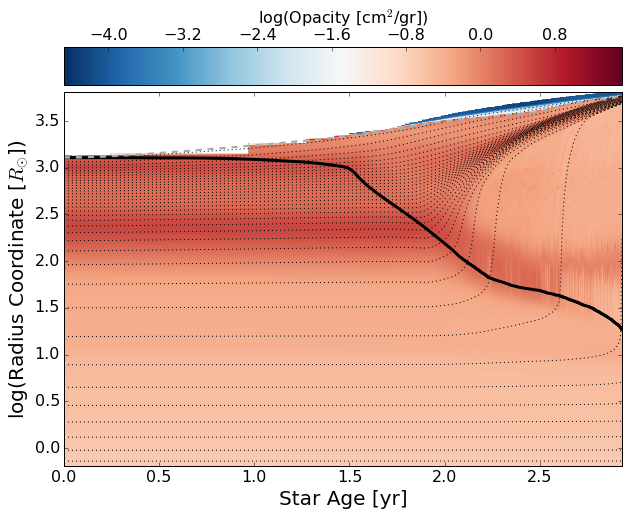

Process running in parallel on  48  cores


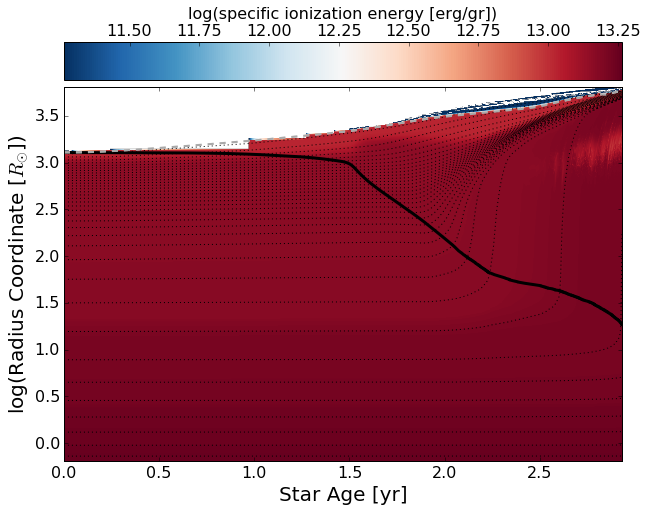

Process running in parallel on  48  cores


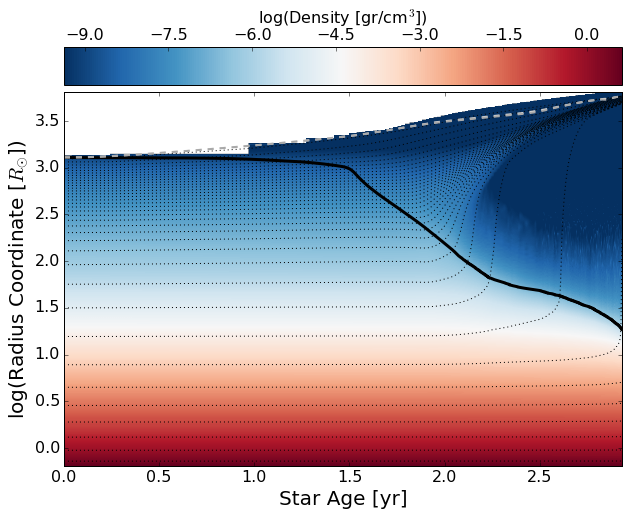

Process running in parallel on  48  cores


/data/disk1/fragkos/repos/CE_mesa/python_scripts/mesa.py:937: RuntimeWarning: divide by zero encountered in log10
  data_to_plot = np.log10(np.transpose(self._data))


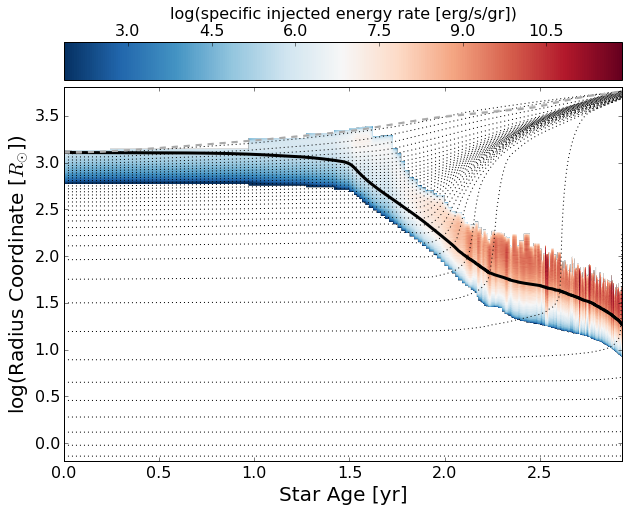

Process running in parallel on  48  cores


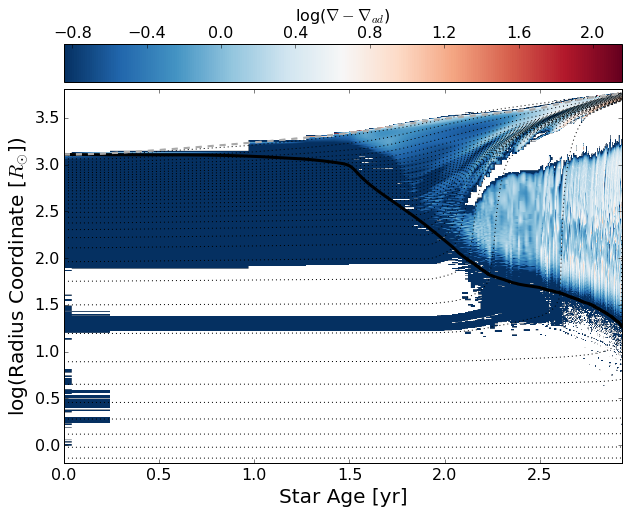

Process running in parallel on  48  cores


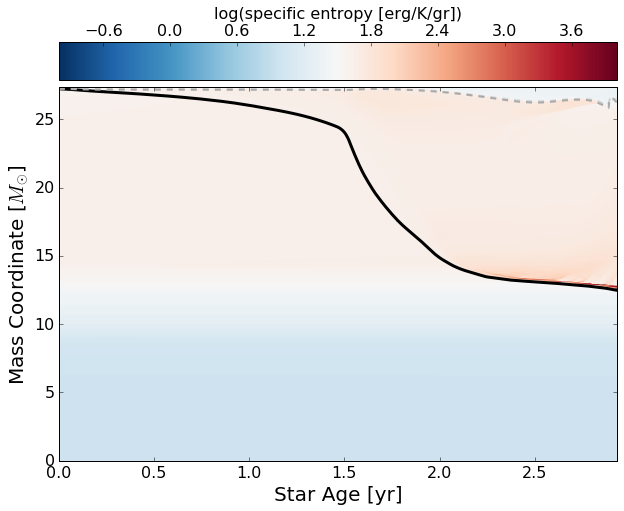

Process running in parallel on  48  cores


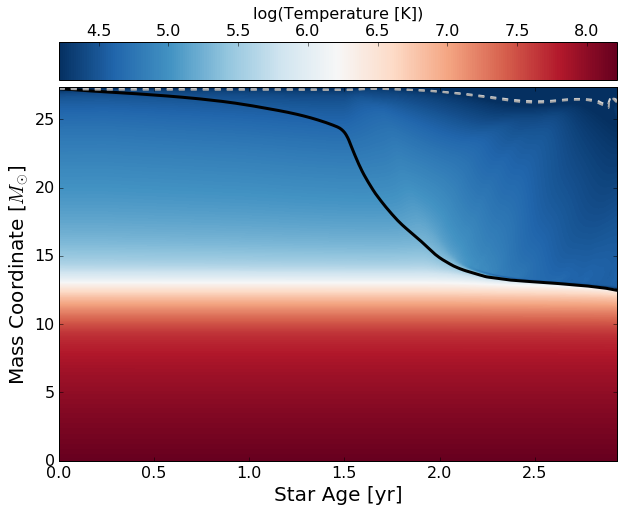

Process running in parallel on  48  cores


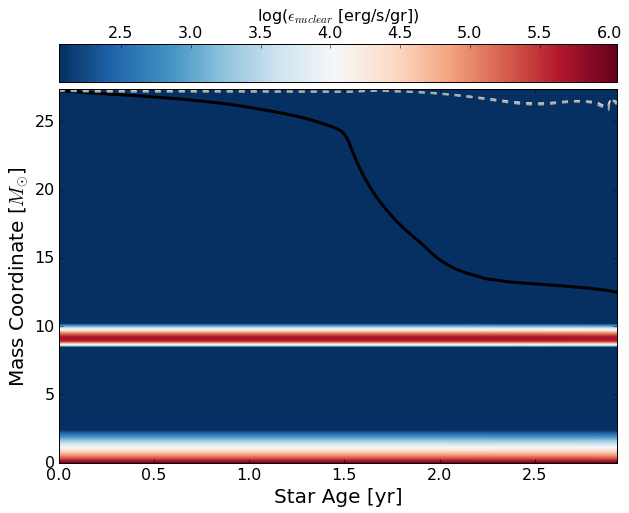

In [22]:
masses_TML = np.linspace(0.5,27.,54)
xvals_TML = np.linspace(1.1,1.9,54)


fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=2.8, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='log_radius', tau10=True, tau100=True, Xaxis="star_age",
               czones=False,cmap='RdBu_r', Variable='v_div_vesc')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"v_div_vesc.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=6.0, signed_log_cmap=False, Variable='t_thermal')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"t_thermal.pdf")
plt.show()




fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=6.0, signed_log_cmap=False, Variable='opacity')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"opacity.pdf")
plt.show()




fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=2.0, signed_log_cmap=False, Variable='ionization_energy')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"ionization_energy.pdf")
plt.show()


fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=10.0, signed_log_cmap=False, Variable='density')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"density.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=10.0, signed_log_cmap=False, Variable='extra_heat')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"extra_heat.pdf")
plt.show()



fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
a.SetParameters(cmap_dynamic_range=3.0, signed_log_cmap=False, Variable='super_ad')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"super_ad.pdf")
plt.show()



fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=5.0, signed_log_cmap=False, Variable='entropy', Yaxis='mass')
a.Kippenhahn(ax1)
plt.savefig(fig_label+"entropy.pdf")
plt.show()

fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=4.0, signed_log_cmap=False, Variable='temperature', Yaxis='mass', Xaxis="star_age")
a.Kippenhahn(ax1)
plt.savefig(fig_label+"vel.pdf")
plt.show()


fig1 = plt.figure(figsize=(10,7.5))
ax1 = fig1.add_subplot(111)
#fig1.subplots_adjust(top=0.80, left=0.12, right=0.9, bottom=0.12)
a.SetParameters(cmap_dynamic_range=4.0, signed_log_cmap=False, Variable='eps_nuc', Yaxis='mass', Xaxis="star_age")
a.Kippenhahn(ax1)
plt.savefig(fig_label+"eps_nuc.pdf")
plt.show()









['/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_200R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_400R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_700R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_1100R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_1000R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_600R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_900R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_100R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_800R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_300R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_500R.data', '/home/evol/fragkos/CE/make_starting_models/CE_paperI_StartingModel_30M_1

ValueError: no field of name log_opacity

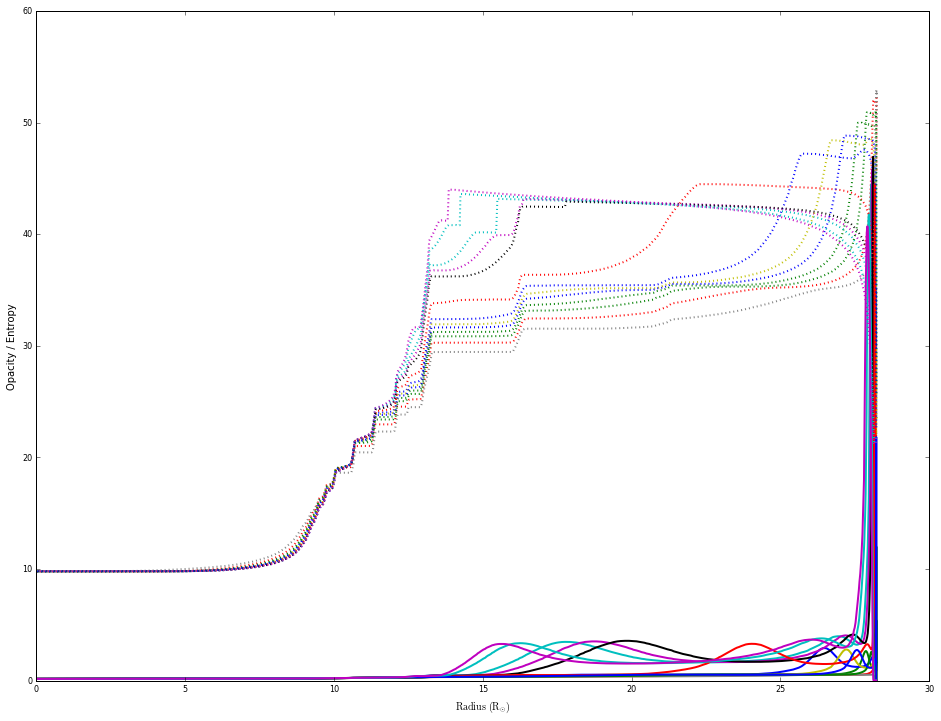

In [13]:
import glob
files = glob.glob("/home/evol/fragkos/CE/make_starting_models/*.data")

print(files)

plt.figure(figsize=(16,12))
plt.xlabel(r'${\rm Radius}\ ({\rm R}_{\odot})$')
plt.ylabel('Opacity / Entropy')

colors = ["r","g", "b", "c", "m", "y", "k", "gray","r","g", "b", "c", "m", "y", "k", "gray"]
i=0
for file in files:
    print(colors[i],file)
    star = np.genfromtxt(file, skip_header=5, names=True)
    plt.plot(star['mass'], 10**star['log_opacity'], color = colors[i] )
    plt.plot(star['mass'], star['entropy'], linestyle=":" , color = colors[i])
    i=i+1


    
plt.savefig("star_profiles_entropy_opacity.pdf")
plt.show()